# Traitement de données tabulaires en Python avec Pandas

Pandas est un module Python qui facilite de travailler avec des données tabulaires - c'est à dire, des données qui sont, comme dans une feuille de calcul, en format de tableau ou de plusieurs tableaux. Il est conçu pour être similaire aux autres langages de traitement des données, notamment à R. Si vous connaissez déjà un peu R, le suivant sera utile pour apprendre à faire en Python ce que vous déjà savez faire en R, et si vous n'avez jamais beaucoup travaillé avec des données tabulaires dans un langage specialisé pour le traitement des données, ici vous allez apprendre des opérations fondamentales qui s'appliquent dans beaucoup d'autres langages.

Ceci est différent qu'apprendre à utiliser les langages et techniques de manipulation des bases de données (comme SQL), ce qui peuvent être utiles pour le stockage de grandes quantités de données numériques mais qu'on ne va pas voir aujourd'hui.

In [28]:
import pandas as pd

Voici le [lien vers la documentation de Pandas](http://pandas.pydata.org/pandas-docs/stable/).

Il va être utile aussi de faire quelques graphiques (si vous tapez ça dans iPython, il faut retirer le `%matplotlib inline`, ce qui est une commande spéciale pour avoir les graphiques dans le notebook Jupyter):

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt

## Les fichiers CSV

Vous avez déjà vu des fichiers CSV ("comma-separated values" - des valeurs séparées par des virgules). Il est un peu exagéré de parler d'un "format CSV" (même si il existe un standard pour les CSVs). Un CSV n'est rien qu'un fichier texte (lisible par l'humain) qui a une entrée sur chaque ligne, dont chacune comprend plusieurs valeurs, une valeur pour chacune d'un ensemble de variables, avec chaque variable dans sa propre "colonne,"  avec des virgules (ou souvent un point-virgule - tant pis pour le "C" dans "CSV") qui servent de délimiteur de "colonne."

Voici un extrait d'un tel fichier:

    001,1,50,316,1,0,10,0,0,tt,234,1180,1
    001,1,50,168,2,10,27,0,0,ff,234,1180,1
    001,1,50,326,2,10,27,0,0,fp,234,1180,1
    001,1,50,326,2,10,27,0,0,rp,234,1180,1

On voit l'idée générale. On ne voit pas, par contre, les noms des colonnes. Dans un CSV la première ligne est typiquement réservé comme en-tête, pour donner les noms des colonnes, séparés également par des virgules (ou des point-virgules, le cas échéant):

    subj,cond,item,value,region,Xstart,Xend,Ystart,Yend,fixationtype,order,questionRT,questionAcc
    001,1,50,316,1,0,10,0,0,tt,234,1180,1
    001,1,50,168,2,10,27,0,0,ff,234,1180,1
    001,1,50,326,2,10,27,0,0,fp,234,1180,1
    001,1,50,326,2,10,27,0,0,rp,234,1180,1
    
## Les fichiers CSV en Pandas

L'autre jour on a lu un fichier CSV en Python ligne par ligne, et on a séparé les variables avec `split()`. En Pandas il est beaucoup plus simple, parce qu'il y'a une fonction `read_csv()`.

Il est possible d'utiliser les liens vers les CSVs sur internet - Pandas sait télécharger:

In [30]:
et_data = pd.read_csv(
"https://raw.githubusercontent.com/chrplr/AIP2016/master/Info-2/11_Pandas/eyetracking_data.txt"
)

Si vous n'avez pas de connexion, ne vous inquietez pas. Si vous avez déjà téléchargé ce fichier, et si il est dans votre répertoire courant vous pouvez faire la même chose avec:

In [31]:
et_data = pd.read_csv("eyetracking_data.txt")

Ou, bien, si vous l'avez dans un autre répertoire et vous connaissez le chemin d'accès complet, vous pouvez utiliser ça à la place. En bref, Pandas a une fonction pour lire des fichiers CSV et qui renvoi un object. En fait, si vous regardez la documentation Pandas, vous allez voir que Pandas a plusieurs autre fonctions pour lire des fichiers qui contiennent des données en forme de tableau (`read_excel()`, `read_sql()`, `read_sas()`, entre autres). 

Vous avez peut-être noté que le nom du fichier qu'on vient de lire n'est pas **.csv** mais **.txt**. Ce n'est peut-être pas le meilleur pratique, mais comme j'ai trouvé ce fichier sur mon disque juste comme ça avec le nom **.txt**, je l'ai laissé comme ça pour vous montrer que ça marche quand même, et pour vous attirer l'attention sur le fait que cette convention de nommage des fichiers CSV est aussi une pratique très courante. (On va se rappeler que l'extension d'un nom de fichier n'impacte pas du tout la façon dont Python va traiter le fichier, sauf si nous l'avons programmé comme ça. L'extension fait partie du nom du fichier et rien d'autre.)

## Un ensemble de données inattendu

Avant de vous montrer le contenu de l'objet `et_data`, je vous montre un extrait de ce fichier, ce qui est en fait le même fichier qu'on a vu avant:

    subj,cond,item,value,region,Xstart,Xend,Ystart,Yend,fixationtype,order,questionRT,questionAcc
    001,1,50,NA,1,0,10,0,0,ff,234,1180,1
    001,1,50,NA,1,0,10,0,0,fp,234,1180,1
    001,1,50,NA,1,0,10,0,0,rp,234,1180,1
    001,1,50,NA,1,0,10,0,0,pr,234,1180,1
    001,1,50,NA,1,0,10,0,0,rb,234,1180,1
    001,1,50,NA,1,0,10,0,0,rr,234,1180,1
    001,1,50,316,1,0,10,0,0,tt,234,1180,1
    001,1,50,168,2,10,27,0,0,ff,234,1180,1
    001,1,50,326,2,10,27,0,0,fp,234,1180,1
    001,1,50,326,2,10,27,0,0,rp,234,1180,1
    001,1,50,0,2,10,27,0,0,pr,234,1180,1

Pour donner le contexte, ici nous avons des données de suivi oculaire (eye-tracking, dont `et_data`), en 12 variables:

- **`subj`**: identifiant de sujet
- **`cond`**: identifiant de condition
- **`item`**: identifiant de stimulus
- **`value`**: valeur de la mesure
- **`region`**: identifiant de la région d'écran
- **`Xstart`**: position horizontale du début de cette région de ce stimulus
- **`Xend`**: position horizontale de la fin de cette région de ce stimulus
- **`Ystart`**: position verticale du début de cette région (de ce stimulus)
- **`Yend`**: position verticale de la fin de cette région (de ce stimulus)
- **`fixationtype`**: type de mesure
- **`order`**: position du stimulus dans la liste expérimentale
- **`questionRT`**: temps de réaction à la question qui est apparu après le stimulus
- **`questionAcc`**: 1 si le sujet a répondu correctement à la question qui est apparu après le stimulus, 0 si la réponse a été érronée

Encore plus d'information: ce sont des données de suivi oculaire pendant la lecture, et plus précisément pendant la lecture. Chaque stimulus est composé de deux phrases, chacune sur sa propre ligne sur l'écran. Chaque stimulus est découpé en 8 régions, qui correspondent chacune à un mot ou un groupe de mots. Chaque région est défini sur l'écran en termes de trois positions: **`Xstart`**, **`Xend`**, qui correspondent à la position horizontal du début et de la fin de cette région sur l'écran, et **`Ystart`**, qui donne la ligne (**`0`** pour la première, **`1`** pour la deuxième). **`Yend`** est toujours égal à **`Ystart`**, sauf dans le cas de la région 4, qui était à la fin de la première ligne, ce qu'on a signalé en mettant **`Yend == 1`** et **`Xend == 0`**. Pour chaque région on a pris sept mesures différentes du temps de lecture, entre eux "first fixation time" (**`fixationtype` == ff**), "first pass reading time" (**`fixationtype` == fp**), "regression path time" (**`fixationtype` == rp**), et quelques autres. Après avoir lu le stimulus, le sujet a dû répondre à une question de compréhension, pour laquelle on a le temps de réaction (**`questionRT`**) et si la réponse est correct ou pas.

Je vous propose un jeu. On va imaginer qu'on vient juste de recevoir ce fichier de quelqu'un qui demande notre aide. On n'a aucune explication sur le contenu sauf ce qu'on vient de voir. Probablement cette personne qui a demandé notre aide nous a posé des questions sur l'analyse de leurs données, mais avant d'être en capacité d'y répondre on doit d'abord comprendre ce tableau qu'on a devant nous. On va donc explorer ensemble ce qu'il y'a dedans.


In [32]:
et_data

,subj,cond,item,value,region,Xstart,Xend,Ystart,Yend,fixationtype,order,questionRT,questionAcc
0,1,1,50,NaN,1,0,10,0,0,ff,234,1180,1
1,1,1,50,NaN,1,0,10,0,0,fp,234,1180,1
2,1,1,50,NaN,1,0,10,0,0,rp,234,1180,1
3,1,1,50,NaN,1,0,10,0,0,pr,234,1180,1
4,1,1,50,NaN,1,0,10,0,0,rb,234,1180,1
5,1,1,50,NaN,1,0,10,0,0,rr,234,1180,1
6,1,1,50,316,1,0,10,0,0,tt,234,1180,1
7,1,1,50,168,2,10,27,0,0,ff,234,1180,1
8,1,1,50,326,2,10,27,0,0,fp,234,1180,1
9,1,1,50,326,2,10,27,0,0,rp,234,1180,1


Petite explication d'un point technique : moi, je travaille dans un notebook Jupyter, et je vois ce beau tableau formatté. Ceci est un peu étonnant, sachant que je n'ai rien fait - j'ai juste tapé le nom de la variable, `et_data`. On se rappelle que dans une session interactive dans le terminal de `python` ou de `ipython` on a une fonction `str()` qui traduit un objet de Python dans un string. Dans un notebook Jupyter, on a une fonction `display()` qui le traduit dans des codes HTML, et qui les insère dans le page web.

In [33]:
type(et_data)

pandas.core.frame.DataFrame

Cette information est très utile - c'est le type de l'objet. Du point de vue pratique, c'est la section de la documentation de Pandas que je vais consulter quand j'ai besoin d'aide avec un tel objet. Et ça va arriver souvent, parce que le DataFrame est l'objet qui représente un tableau en Pandas.

Je suppose que la variable principale qui m'intéresse est `value`, ce qui correspond à la valeur d'une mesure du temps de lecture. J'accède à la colonne:

In [34]:
et_data['value']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          316
7          168
8          326
9          326
10           0
11         326
12         161
13         487
14         339
15         339
16         339
17           0
18         339
19         NaN
20         339
21         202
22         654
23         654
24           0
25         654
26         NaN
27         654
28         168
29         168
          ... 
107980     NaN
107981     769
107982     147
107983     537
107984     537
107985       0
107986     537
107987     866
107988    1403
107989     216
107990     216
107991     216
107992       0
107993     216
107994     294
107995     510
107996     185
107997     185
107998     185
107999       0
108000     185
108001     199
108002     384
108003     280
108004    1240
108005    3474
108006       1
108007    2115
108008     875
108009    2115
Name: value, dtype: float64

D'abord le point technique : on a un affichage un peu différent, sans ce beau tableau, et ce qu'on reconnait pas (on n'a pas, par exemples, des crochet familiers d'une liste) qui implique que Jupyter n'a pas fait la même conversion en HTML, ce qui implique qu'on n'a pas le même type d'objet ici.

In [35]:
type(et_data['value'])

pandas.core.series.Series

OK - c'est bon à savoir. On met ça de côté pour l'instant - qu'est-ce qu'on voit? On voit une numérotation des lignes, qui commence par zéro, et des valeurs qui correspondent aux valeurs dans la colonne du tableau qu'on a vu avant. Là-dedans on voit des chiffres et des `NaN`s. Ces `NaN`s correspondent aux valeurs qui étaient codées par `NA` dans le fichier CSV. Quand on travaille avec des données il est presque toujours le cas qu'on aura des valeurs manquantes, et c'est ça qu'on voit ici. Ça peut correspondre à un problème, ou pas. Ici on ne sait toujours pas pourquoi on a des valeurs manquantes. On va inquêter. En réalité, comme il est important de comprendre pourquoi on a des valeurs manquantes avant de décider comment les traiter, si on n'arrivait pas à les comprendre, on poserait probablement la question à la personne qui nous avait envoyé le fichier. En tout cas, ils ont bien fait ici, parce qu'ils ont mis `NA` dans le fichier CSV pour signaler une valeur manquante. Ils n'ont pas, par exemple, remplacé toutes les données manquantes avec zéro tout au début, avant même de sauvegarder les données. Remplacer, ou bien supprimer, les données manquantes peut être utile, mais ces stratégies sont irréversibles. `NA` est une valeur conventionnelle pour signaler des valeurs manquantes dans des CSVs, de même que laisser la colonne vide.

Pandas comprend ces deux stratégies, et il convertit les valeurs manquantes trouvées dans un CSV en un objet spéciale:

In [36]:
et_data['value'][0]

nan

Celà signifie "not a number." On va en reparler bientôt. Pour le moment, regardons ce qu'il y'a en bas:

    Name: value, dtype: float64
    
`Name: value` est le nom de cette variable. Si on avait pris la colonne **`subj`**, on aurait vu `Name: subj` au lieu. `dtype: float64` nous donne le type de cette variable. Une variable dans un tableau n'est pas comme une liste Python normale, qui peut contenir plusieurs types d'objet:

In [37]:
[0, "A", "B", 2.3]

[0, 'A', 'B', 2.3]

Quand on a des données dans un tableau, il est presque toujours le cas que chacune des variables est uniforme en type. On n'a presque jamais besoin d'un mélange de plusieurs types dans une colonne, parce que l'idée d'un tableau est que les lignes sont interchangeables : toute manipulation que je peux faire avec la ligne 12, je peux faire avec la ligne 12000 - la seule différence est qu'elle correspondent à deux observations différentes. Il est donc presque toujours enforcé dans les systèmes pour travailler avec des données tabulaires (y compris les feuilles de calcul), qu'une variable n'a qu'un seule type. Dans ce cas-ci, on a des floats (plus précisément, les `float64` - on va en reparler).

In [38]:
et_data['value'].dtype

dtype('float64')

En `fixationtype` on aurait attendu, par contre, peut-être un `str`, parce qu'on a des valeurs non-numériques. On a, en fait, quelque chose plus générique:

In [39]:
et_data['fixationtype'].dtype

dtype('O')

Le `O` est pour "objet Python", ce qui veut dire, cette variable peut, effectivement, contenir des objets de n'importe quel type. Donc, il est possible d'avoir une colonne plus flexible en Pandas que dans (par exemple) une feuille de calcul, ou on peut avoir des listes, des dicts, et tout ça - et c'est cette sorte de colonne flexible qui est créée par Pandas quand il y'a des valeurs non-numériques dans un fichier CSV. Les éléments sont quand même juste des chaines de caractères.

On regarde de nouveau `value`. On est peut-être un peu impatient, et, sans penser, on fait le suivant, pour afficher un histogramme des valeurs dans cette colonne:

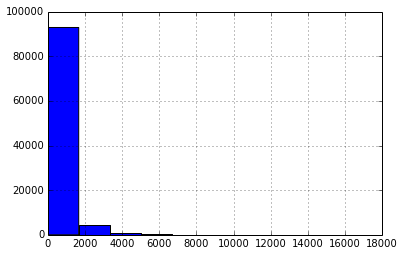

In [40]:
et_data['value'].hist()

(Si vous travaillez en iPython, il faut aussi taper `plt.show()` pour que ça s'affiche.)

On peut donc dire quelque chose un peu plus concrète de  ce type `pandas.core.series.Series`, qui le type de cette colonne. Il est un type d'objet spécialisé pour la représentation des variables du tableau. Il applique le règle que chaque valeur d'une variable doit être du même type (même si il est possible que ce type soit `object`, ce qui permet n'importe quelle valeur). Il contient plusieures autre méthodes (fonctions) utiles, comme `hist()`, qui nous génère un histogramme, ou, bien, celles-ci:

In [41]:
et_data['value'].max()

16733.0

In [44]:
et_data['value'].min()

0.0

In [45]:
et_data['value'].mean()

526.16905243266854

In [48]:
et_data['value'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: value, dtype: float64

In [50]:
et_data['value'].tail()

108005    3474
108006       1
108007    2115
108008     875
108009    2115
Name: value, dtype: float64

Un `DataFrame` est un objet qui contient un ou plusieurs objets `Series`, et qui les met ensemble en forme de tableau. `DataFrame` aussi fournit des méthodes utiles (entre eux également `head()` et `tail()`).

On va arrêter de faire ces manipulations avec `et_data['value']` - on se rappelle de l'information que nous a donné notre collègue:

- **`value`**: valeur de la mesure
- **`fixationtype`**: type de mesure

En fait, il semble qu'on fait n'importe quoi. Les valeurs de **`value`** qui correspondent à **`fixationtype == ff`** ne sont pas du tout comparables à ceux qui portent **`fixationtype == fp`** (par exemple). J'aimerais bien sélectionner juste ces lignes du tableau qui ont **`fixationtype == ff`**, mais on est en train d'utiliser toute la colonne **`value`**.

Avant d'apprendre à faire ça, je vous laisse quelques minutes pour explorer les méthodes fournies par `Series` et `DataFrame`. Utilisez la documentation (`?` en iPython, ou par internet) pour découvrir d'autres arguments aux méthodes qu'on vient de voir, et utiliser la fonction `dir()` sur un objet pour voir une liste de méthodes ou de champs accessible avec le point (`.`). Explorez un peu ces autres méthodes, et dites-moi si vous trouvez des choses intéressantes, particulièrement dans la sortie de `dir(et_data)`.

## Sélection de lignes

In [52]:
et_data.head(12)

,subj,cond,item,value,region,Xstart,Xend,Ystart,Yend,fixationtype,order,questionRT,questionAcc
0,1,1,50,NaN,1,0,10,0,0,ff,234,1180,1
1,1,1,50,NaN,1,0,10,0,0,fp,234,1180,1
2,1,1,50,NaN,1,0,10,0,0,rp,234,1180,1
3,1,1,50,NaN,1,0,10,0,0,pr,234,1180,1
4,1,1,50,NaN,1,0,10,0,0,rb,234,1180,1
5,1,1,50,NaN,1,0,10,0,0,rr,234,1180,1
6,1,1,50,316,1,0,10,0,0,tt,234,1180,1
7,1,1,50,168,2,10,27,0,0,ff,234,1180,1
8,1,1,50,326,2,10,27,0,0,fp,234,1180,1
9,1,1,50,326,2,10,27,0,0,rp,234,1180,1


On vient de se rendre compte du fait que ça n'a pas tant de sens de travailler avec ce tableau tout entier. Imagine qu'on veut juste la mesure `ff`. On a des valeurs `ff` sur la ligne 0, après 7, et chaque huit lignes après ça. On peut bien sûr acceder directement a une ligne d'un `DataFrame`:

In [58]:
et_data.iloc[[0,7],:]

,subj,cond,item,value,region,Xstart,Xend,Ystart,Yend,fixationtype,order,questionRT,questionAcc
0,1,1,50,NaN,1,0,10,0,0,ff,234,1180,1
7,1,1,50,168,2,10,27,0,0,ff,234,1180,1


Vous pouvez également accéder à un sous-ensemble de colonnes, sélectionnées par position:

In [60]:
et_data.iloc[[0,7],[0,1,2,3,4,9]]

,subj,cond,item,value,region,fixationtype
0,1,1,50,NaN,1,ff
7,1,1,50,168,2,ff


Donc, comme une liste ou un dictionnaire, on peut sélectionner des éléments d'un `DataFrame` en utilisant les crochets. On peut imaginer qu'on a une sorte de matrice, qui est un peu comme une liste, mais qui a deux dimensions, ligne et colonne. Dans les crochets on met donc deux index séparés par une virgule, au lieu de juste un.

L'indexation par position est une opération de très bas niveau que vous n'allez utiliser que rarement. Même si il serait possible de construire la liste d'index qui correspondent aux lignes **`fixationtype == ff`** ([0, 7, 15, ...]), étant donné notre connaissance du fait que chaque huit lignes on a une **`fixationtype == ff`**, une telle approche serait vulnérable à l'erreur, peu lisible, et ne fonctionnerait que pour ce tableau - si on change le tableau pour casser cette alternance, on va devoir réécrire cette opération de sélection (et on n'a même pas vérifié qu'il y'a cette alternance partout dans le tableau actuel).

Pour sélectionner tout les lignes qui ont **`fixationtype == ff`**:

In [62]:
et_data.query('fixationtype == "ff"')

,subj,cond,item,value,region,Xstart,Xend,Ystart,Yend,fixationtype,order,questionRT,questionAcc
0,1,1,50,NaN,1,0,10,0,0,ff,234,1180,1
7,1,1,50,168,2,10,27,0,0,ff,234,1180,1
14,1,1,50,339,3,27,35,0,0,ff,234,1180,1
21,1,1,50,202,4,35,0,0,1,ff,234,1180,1
28,1,1,50,168,5,0,18,1,1,ff,234,1180,1
35,1,1,50,158,6,18,24,1,1,ff,234,1180,1
42,1,1,50,339,7,24,35,1,1,ff,234,1180,1
49,1,1,50,202,8,35,62,1,1,ff,234,1180,1
56,1,8,81,119,1,0,11,0,0,ff,29,1937,1
63,1,8,81,272,2,11,25,0,0,ff,29,1937,1


(Il faut savoir que cette méthode n'est disponible qu'en Pandas 0.13 et supérieure. Il y'a une autre façon de faire la même chose qu'on va voir bientôt.)

In [65]:
et_data.query('fixationtype == "ff"')['value'].head()

0     NaN
7     168
14    339
21    202
28    168
Name: value, dtype: float64

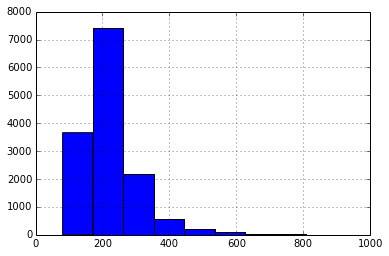

In [66]:
et_data.query('fixationtype == "ff"')['value'].hist()

On peut modifier nos requêtes avec les opérateurs **&** (conjonction), **|** (disjonction), et **~** (négation).

In [67]:
et_data.query('fixationtype == "ff" & region == 3').head()

,subj,cond,item,value,region,Xstart,Xend,Ystart,Yend,fixationtype,order,questionRT,questionAcc
14,1,1,50,339,3,27,35,0,0,ff,234,1180,1
70,1,8,81,251,3,25,34,0,0,ff,29,1937,1
126,1,4,5,213,3,17,25,0,0,ff,132,1027,1
182,1,11,60,NaN,3,23,30,0,0,ff,90,2237,1
238,1,18,67,140,3,28,36,0,0,ff,337,991,1


In [70]:
et_data.query('fixationtype == "ff" & (region == 3 | region == 6)').head()

,subj,cond,item,value,region,Xstart,Xend,Ystart,Yend,fixationtype,order,questionRT,questionAcc
14,1,1,50,339,3,27,35,0,0,ff,234,1180,1
35,1,1,50,158,6,18,24,1,1,ff,234,1180,1
70,1,8,81,251,3,25,34,0,0,ff,29,1937,1
91,1,8,81,272,6,19,25,1,1,ff,29,1937,1
126,1,4,5,213,3,17,25,0,0,ff,132,1027,1


In [71]:
et_data.query('fixationtype == "ff" & ~(region == 3 | region == 6)').head()

,subj,cond,item,value,region,Xstart,Xend,Ystart,Yend,fixationtype,order,questionRT,questionAcc
0,1,1,50,NaN,1,0,10,0,0,ff,234,1180,1
7,1,1,50,168,2,10,27,0,0,ff,234,1180,1
21,1,1,50,202,4,35,0,0,1,ff,234,1180,1
28,1,1,50,168,5,0,18,1,1,ff,234,1180,1
42,1,1,50,339,7,24,35,1,1,ff,234,1180,1


Je vous laisse formuler vos propres requêtes `query()` quelques instants avant de procéder.

Cette sélection de lignes me rappelle de ce petit détail concernant les régions et le **`Ystart`**/**`Yend`** que je n'ai pas bien saisi. Il me semble que la plupart du temps **`Ystart == Yend`**, mais j'ai oublié la raison que ce n'est pas toujours le cas.

In [143]:
et_data.query('fixationtype == "ff" & Ystart == Yend').head()

,subj,cond,item,value,region,Xstart,Xend,Ystart,Yend,fixationtype,order,questionRT,questionAcc
0,1,1,50,NaN,1,0,10,0,0,ff,234,1180,1
7,1,1,50,168,2,10,27,0,0,ff,234,1180,1
14,1,1,50,339,3,27,35,0,0,ff,234,1180,1
28,1,1,50,168,5,0,18,1,1,ff,234,1180,1
35,1,1,50,158,6,18,24,1,1,ff,234,1180,1


In [145]:
et_data.query('fixationtype == "ff" & Ystart != Yend').head()

,subj,cond,item,value,region,Xstart,Xend,Ystart,Yend,fixationtype,order,questionRT,questionAcc
21,1,1,50,202,4,35,0,0,1,ff,234,1180,1
77,1,8,81,156,4,34,0,0,1,ff,29,1937,1
133,1,4,5,215,4,25,0,0,1,ff,132,1027,1
189,1,11,60,219,4,30,0,0,1,ff,90,2237,1
245,1,18,67,153,4,36,0,0,1,ff,337,991,1


Je vois qu'il y'a peut-être un rapport avec **`region`** et je regarde donc les valeurs de cette variable dans les cas où **`Ystart == Yend`** (ou pas).

In [155]:
et_data.query('fixationtype == "ff" & Ystart == Yend')['region'].unique()

array([1, 2, 3, 5, 6, 7, 8])

In [152]:
et_data.query('fixationtype == "ff" & Ystart != Yend')['region'].unique()

array([4])

Je vois ce qui se passe, ce qui est que pour la région 4, et seulement pour la région 4, **`Ystart == 0`** et **`Yend == 1`**. Je repasse par le document que mon collègue m'a envoyé, où il est noté que le stimulus était présenté sur deux lignes, et le **`Ystart`** et **`Yend`** codent la ligne du regard du sujet, sauf **`Yend`**, qui était à la fin de la première ligne, où ils ont décidé que la fin de cette région était, officiellement, sur la deuxième ligne.

On va passer à la deuxième méthode de sélectionner les lignes par leurs valeurs, ce qui est très similaire.

In [165]:
et_data[et_data['fixationtype'] == "ff"].head()

,subj,cond,item,value,region,Xstart,Xend,Ystart,Yend,fixationtype,order,questionRT,questionAcc
0,1,1,50,NaN,1,0,10,0,0,ff,234,1180,1
7,1,1,50,168,2,10,27,0,0,ff,234,1180,1
14,1,1,50,339,3,27,35,0,0,ff,234,1180,1
21,1,1,50,202,4,35,0,0,1,ff,234,1180,1
28,1,1,50,168,5,0,18,1,1,ff,234,1180,1


In [164]:
ff_rows_query = et_data.query('fixationtype == "ff"')
ff_rows_boolean_indexation = et_data[et_data['fixationtype'] == "ff"]
ff_rows_query.equals(ff_rows_boolean_indexation)

True

Celui-là est pour vous assurer que les deux méthodes sont équivalentes - je vérifie que les résultats sont équivalents. Mais vous allez peut-être demander pourquoi j'ai utilisé ce `.equals()` et non pas `==`. Essayez-le maintenant : `ff_rows_query == ff_rows_boolean_indexation`. Ce résultat un peu inattendu va nous aider à comprendre un peu plus profondément la méthode d'indexation booléenne. On essaie le suivant:

In [167]:
et_data['fixationtype'] == "ff"

0          True
1         False
2         False
3         False
4         False
5         False
6         False
7          True
8         False
9         False
10        False
11        False
12        False
13        False
14         True
15        False
16        False
17        False
18        False
19        False
20        False
21         True
22        False
23        False
24        False
25        False
26        False
27        False
28         True
29        False
          ...  
107980    False
107981    False
107982     True
107983    False
107984    False
107985    False
107986    False
107987    False
107988    False
107989     True
107990    False
107991    False
107992    False
107993    False
107994    False
107995    False
107996     True
107997    False
107998    False
107999    False
108000    False
108001    False
108002    False
108003     True
108004    False
108005    False
108006    False
108007    False
108008    False
108009    False
Name: fixationtype, dtyp

Nous avons un nouvel objet `Series` de la longeur du `DataFrame` original qui contient `True` là où **`fixationtype == "ff"`** et `False` sinon. (Le type est `bool`.) On va affecter cet objet à une variable:

In [176]:
is_ff = et_data['fixationtype'] == "ff"
et_data[is_ff].head()

,subj,cond,item,value,region,Xstart,Xend,Ystart,Yend,fixationtype,order,questionRT,questionAcc
0,1,1,50,NaN,1,0,10,0,0,ff,234,1180,1
7,1,1,50,168,2,10,27,0,0,ff,234,1180,1
14,1,1,50,339,3,27,35,0,0,ff,234,1180,1
21,1,1,50,202,4,35,0,0,1,ff,234,1180,1
28,1,1,50,168,5,0,18,1,1,ff,234,1180,1


In [185]:
et_data[is_ff].equals(ff_rows_query)

True

On regarde ce qui se passe quand on essaie d'utiliser comme index un objet `Series` qui n'est pas de la même longeur que le `DataFrame`.

In [203]:
is_ff_first_10 = is_ff[0:10]
et_data[is_ff_first_10]

IndexingError: Unalignable boolean Series key provided

En bref: nous avons la possibilité de sélectionner un sous-ensemble des lignes d'un tableau en utilisant un `Series` booléen (de `True` ou `False`), ce qui, pour chaque ligne, spécifie si cette ligne sera incluse dans la sortie (`True`) ou pas (`False`). On peut générer un tel objet à partir d'un `Series` avec des opérations comme `== "ff"` qui vont être evalué, comme ce qu'on a vu avant avec le `DataFrame`, par élément. 

In [199]:
is_ystart_0 = et_data['Ystart'] == 0
is_ystart_0.head()

0    True
1    True
2    True
3    True
4    True
Name: Ystart, dtype: bool

On peut également comparer deux `Series` pour obtenir un objet `Series` de type `bool`, qui peut être utiliser pour l'indexation.

In [200]:
is_ystart_eq_yend = et_data['Ystart'] == et_data['Yend']
is_ystart_eq_yend

0          True
1          True
2          True
3          True
4          True
5          True
6          True
7          True
8          True
9          True
10         True
11         True
12         True
13         True
14         True
15         True
16         True
17         True
18         True
19         True
20         True
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28         True
29         True
          ...  
107980    False
107981    False
107982     True
107983     True
107984     True
107985     True
107986     True
107987     True
107988     True
107989     True
107990     True
107991     True
107992     True
107993     True
107994     True
107995     True
107996     True
107997     True
107998     True
107999     True
108000     True
108001     True
108002     True
108003     True
108004     True
108005     True
108006     True
108007     True
108008     True
108009     True
dtype: bool

## Réorganisation de données

Je suis un peu embêté par ce tableau. Premièrement, il y'a beaucoup de variables, qui peuvent peut-être nous aider à un moment donné, mais qui pour l'instant créent un peu de confusion.

In [245]:
et_data.head()

,subj,cond,item,value,region,Xstart,Xend,Ystart,Yend,fixationtype,order,questionRT,questionAcc
0,1,1,50,NaN,1,0,10,0,0,ff,234,1180,1
1,1,1,50,NaN,1,0,10,0,0,fp,234,1180,1
2,1,1,50,NaN,1,0,10,0,0,rp,234,1180,1
3,1,1,50,NaN,1,0,10,0,0,pr,234,1180,1
4,1,1,50,NaN,1,0,10,0,0,rb,234,1180,1


Je me rappelle, par exemple, que la position qu'on voit ici n'est pas la position du regard du sujet, mais juste la position sur l'écran de la région du stimulus:

- **`Xstart`**: position horizontale du début de cette région de ce stimulus
- **`Xend`**: position horizontale de la fin de cette région de ce stimulus
- **`Ystart`**: position verticale du début de cette région (de ce stimulus)
- **`Yend`**: position verticale de la fin de cette région (de ce stimulus)

On peut enlever cette information de ce tableau pour le mettre de côté dans un autre. J'aimerais juste vérifier que j'ai compris ce qui se passe dans ce tableau avant de faire n'importe quoi. J'aimerais vérifier que, effectivement, la position est propre à, par exemple, la région 2 de stimulus 50 dans condition 1, et ne peut pas varier entre sujets, ou entre mésures.

Comment est-ce qu'on ferait ça?

On sort les colonnes qui sont, selon cette hypothèse, propre à une région (dans un stimulus, dans une condition):

In [262]:
region_data = et_data[['cond', 'item', 'region', 'Xstart', 'Xend', 'Ystart', 'Yend']]
region_data.head()

,cond,item,region,Xstart,Xend,Ystart,Yend
0,1,50,1,0,10,0,0
1,1,50,1,0,10,0,0
2,1,50,1,0,10,0,0
3,1,50,1,0,10,0,0
4,1,50,1,0,10,0,0


Il y'a des doubles; on les enlève.

In [263]:
region_data = region_data.drop_duplicates()
region_data.head()

,cond,item,region,Xstart,Xend,Ystart,Yend
0,1,50,1,0,10,0,0
7,1,50,2,10,27,0,0
14,1,50,3,27,35,0,0
21,1,50,4,35,0,0,1
28,1,50,5,0,18,1,1


Si on a raison, il n'y aura qu'une seule ligne dans ce tableau pour chaque combinaison de **`cond`**, **`item`**, et **`region`**.

In [264]:
region_data.duplicated(['cond', 'item', 'region'])

0         False
7         False
14        False
21        False
28        False
35        False
42        False
49        False
56        False
63        False
70        False
77        False
84        False
91        False
98        False
105       False
112       False
119       False
126       False
133       False
140       False
147       False
154       False
161       False
168       False
175       False
182       False
189       False
196       False
203       False
          ...  
107800    False
107807    False
107814    False
107821    False
107828    False
107835    False
107842    False
107849    False
107856    False
107863    False
107870    False
107877    False
107884    False
107891    False
107898    False
107905    False
107912    False
107919    False
107926    False
107933    False
107940    False
107947    False
107954    False
107961    False
107968    False
107975    False
107982    False
107989    False
107996    False
108003    False
dtype: bool

In [265]:
region_data.duplicated(['cond', 'item', 'region']).any()

False

In [269]:
region_data[region_data.duplicated(['cond', 'item', 'region'])]

,cond,item,region,Xstart,Xend,Ystart,Yend


On a maintenant un tableau qui contient que l'information positionnelle. On peut le mettre un peu plus propre.

In [267]:
region_data = region_data.reset_index().drop('index', axis=1)
region_data.head()

,cond,item,region,Xstart,Xend,Ystart,Yend
0,1,50,1,0,10,0,0
1,1,50,2,10,27,0,0
2,1,50,3,27,35,0,0
3,1,50,4,35,0,0,1
4,1,50,5,0,18,1,1


In [273]:
region_data = region_data.drop('Yend', axis=1)
region_data = region_data.rename(columns={'Ystart':'line'})
region_data.head()

,cond,item,region,Xstart,Xend,line
0,1,50,1,0,10,0
1,1,50,2,10,27,0
2,1,50,3,27,35,0
3,1,50,4,35,0,0
4,1,50,5,0,18,1


In [275]:
experimental_data = et_data.drop(['Xstart', 'Xend', 'Ystart', 'Yend'], axis=1)
experimental_data.head()

,subj,cond,item,value,region,fixationtype,order,questionRT,questionAcc
0,1,1,50,NaN,1,ff,234,1180,1
1,1,1,50,NaN,1,fp,234,1180,1
2,1,1,50,NaN,1,rp,234,1180,1
3,1,1,50,NaN,1,pr,234,1180,1
4,1,1,50,NaN,1,rb,234,1180,1


Il me paraît bizarre quand même d'avoir cet arrangement, où j'ai une colonne (**`value`**) qui spécifie la valeur d'une mesure, et une autre colonne (**`fixationtype`**) qui m'explique quelle mesure c'est. Ça ne comporte pas très bien avec l'idée que chaque variable soit uniforme, parce que l'interprétation de **`value`** n'est pas cohérente - elle change en fonction de **`fixationtype`**. Effectivement, il y'a une de ces sept mesures qui prend des valeurs très différentes par rapport aux autres : essayez de la trouver.

Ce que je préfère, si je n'ai pas une bonne raison d'arranger mes données comme ça, est d'avoir une colonne par mesure.

In [291]:
fixation_data = experimental_data.pivot_table(index=['subj', 'cond', 'item', 'region', 'order'],
                              columns='fixationtype',
                              values='value')
fixation_data = fixation_data.reset_index()
fixation_data.dtypes.index.name = None
fixation_data.head()

,subj,cond,item,region,ff,fp,pr,rb,rp,rr,tt
0,1,1,2,1,171,171,0,171,171,1049,1220
1,1,1,2,2,253,253,0,253,253,704,957
2,1,1,2,3,289,289,0,289,289,388,677
3,1,1,2,4,284,284,0,284,284,185,469
4,1,1,2,5,171,171,0,171,171,1049,1220


Si jamais on voulait remettre ce tableau dans l'ancien format, il y'a une function qui s'appelle `pd.melt()`.

On vient de perdre les données sur les questions, ce qui n'est pas grave; ça pourrait aller dans un tableau à part aussi.

In [314]:
question_data = experimental_data[['subj', 'cond', 'item', 'order', 'questionRT', 'questionAcc']]
question_data = question_data.drop_duplicates()
question_data = question_data.reset_index().drop('index', axis=1)
question_data.head()

,subj,cond,item,order,questionRT,questionAcc
0,1,1,50,234,1180,1
1,1,8,81,29,1937,1
2,1,4,5,132,1027,1
3,1,11,60,90,2237,1
4,1,18,67,337,991,1


On a maintenant trois tableaux beaucoup plus clairs qu'avant. Par exemple, on voit clairement que ces sept mesures semblent être reliées:

In [296]:
(fixation_data['ff'] == fixation_data['fp']).sum()

8110

In [298]:
(fixation_data['ff'] == fixation_data['fp']).sum()/float(len(fixation_data))

0.52559948152948799

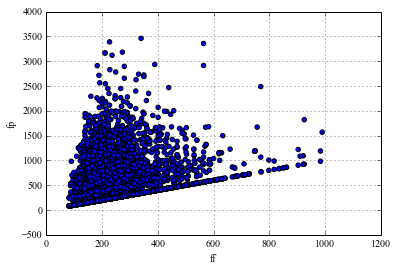

In [300]:
fixation_data.plot(y='fp', x='ff', kind='scatter')

array([<matplotlib.axes.AxesSubplot object at 0x129836e10>,
       <matplotlib.axes.AxesSubplot object at 0x12a5cc190>], dtype=object)

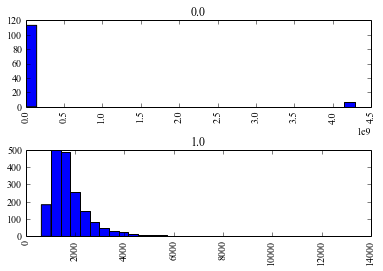

In [315]:
question_data.hist('questionRT', by='questionAcc', bins=30, layout=(2,1))

Si jamais on doit mettre ces tableaux ensemble - par exemple, pour voir le **`ff`** juste sur la deuxième ligne - on utiliserait la fonction `merge()`:

In [317]:
region_data.merge(fixation_data).head()

,cond,item,region,Xstart,Xend,line,subj,ff,fp,pr,rb,rp,rr,tt
0,1,50,1,0,10,0,1,NaN,NaN,NaN,NaN,NaN,NaN,316
1,1,50,1,0,10,0,25,107,107,0,107,107,NaN,107
2,1,50,2,10,27,0,1,168,326,0,326,326,161,487
3,1,50,2,10,27,0,25,254,254,0,254,254,455,709
4,1,50,3,27,35,0,1,339,339,0,339,339,NaN,339


Comme ça on voit qu'on a toujours toutes les mêmes données, sauf que maintenant elles sont organisées différemment. Il y'a plusieurs façons d'organiser un ensemble de données dans un ou plusieurs tableaux. Quand vous commencez à travailler avec vos propres données, il sera utile à un moment donné de réfléchir sur cette question. En fait, il y'a des gens qui travaillent dans la conception des bases de données qui ne font rien que réfléchir sur cette question. La façon dont je viens d'organiser ces données est assez standard. Vous pouvez lire [cet article sur l'idée de *tidy data*](http://vita.had.co.nz/papers/tidy-data.pdf) - un peu idéologique et prenant des exemples qui marchent qu'en R, mais quand même avec une recommandation très pratique. (Vous devez d'abord réfléchir sur la question de pourquoi je ne suis pas allé plus loin pour organiser les régions par colonne au lieu de par ligne - c'est à dire, une colonne `ff_region_1`, une colonne `ff_region_2`, etc., une colonne `fp_region_1`, etc., et non pas huit lignes. On va devoir faire ça bientôt, mais il y'a une raison de éviter ça comme organisation principale.)

## Le problème de notre collègue

On vient d'apprendre beaucoup. Le problème que notre collègue nous a posé est le suivant. Il y'a des régions pour lesquelles il semble que toutes les mesures sont fortement liées, beaucoup plus qu'on attendrait, ce qui peut indiquer qu'il y'a un problème avec les données.

Je vous demande de sortir les données **`ff`**, de réorganiser ce tableau avec une région par colonne (c'est à dire, la valeur de **`ff`** qui correspond à l'observation pour région 1 dans une colonne, pour région 2 dans une autre, etc; gardez les colonnes **`subj`**, **`cond`**, **`item`**). Vous allez appeler ces colonnes **`ff_r1`**, **`ff_r2`**, etc.

In [335]:
ff_data_byregion = fixation_data[['subj', 'cond', 'item', 'region', 'ff']].pivot_table(index=['subj', 'cond', 'item'],
                                                               columns='region',
                                                               values='ff').reset_index()
ff_data_byregion = ff_data_byregion.rename(columns={1: 'ff_r1',
                                 2: 'ff_r2',
                                 3: 'ff_r3',
                                 4: 'ff_r4',
                                 5: 'ff_r5',
                                 6: 'ff_r6',
                                 7: 'ff_r7',
                                 8: 'ff_r8',
                                })
ff_data_byregion.dtypes.index.name = None
ff_data_byregion.head()

,subj,cond,item,ff_r1,ff_r2,ff_r3,ff_r4,ff_r5,ff_r6,ff_r7,ff_r8
0,1,1,2,171,253,289,284,171,253,NaN,289
1,1,1,26,137,216,NaN,125,137,NaN,216,125
2,1,1,50,NaN,168,339,202,168,158,339,202
3,1,1,74,169,190,134,NaN,169,NaN,190,134
4,1,2,3,NaN,160,230,295,160,NaN,230,295


array([[<matplotlib.axes.AxesSubplot object at 0x1346685d0>,
        <matplotlib.axes.AxesSubplot object at 0x13e665210>]], dtype=object)

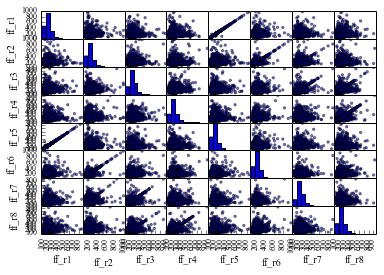

In [336]:
pd.tools.plotting.scatter_matrix(ff_data_byregion.drop(['subj', 'cond', 'item'], axis=1))

## D'autres manipulations utiles

In [338]:
pre_a1_data = pd.read_csv(
"https://raw.githubusercontent.com/chrplr/AIP2016/master/Info-2/11_Pandas/pre_a1.txt"
)
pre_a2_data = pd.read_csv(
"https://raw.githubusercontent.com/chrplr/AIP2016/master/Info-2/11_Pandas/pre_a2.txt"
)
test_a1_data = pd.read_csv(
"https://raw.githubusercontent.com/chrplr/AIP2016/master/Info-2/11_Pandas/test_a1.txt"
)
test_a2_data = pd.read_csv(
"https://raw.githubusercontent.com/chrplr/AIP2016/master/Info-2/11_Pandas/test_a2.txt"
)
pre_a1_data.head()

,Subject,Trial,ItemNo,RT,Accuracy
0,1,1,1,1502.04,0
1,1,2,2,402.07,0
2,1,3,3,866.97,0
3,1,4,4,463.34,1
4,1,5,5,801.92,0


In [345]:
pre_a1_data['Condition'] = "A1"
pre_a1_data['PrePost'] = "Pre"
pre_a2_data['Condition'] = "A2"
pre_a2_data['PrePost'] = "Pre"
test_a1_data['Condition'] = "A1"
test_a1_data['PrePost'] = "Post"
test_a2_data['Condition'] = "A2"
test_a2_data['PrePost'] = "Post"
pre_a1_data.head()
test_a2_data.head()

,Subject,Trial,ItemNo,RT,Accuracy,Condition,PrePost
0,1,1,11061092,1616.01,1,A2,Post
1,1,2,21061092,1511.34,0,A2,Post
2,1,3,24012031,4000.00,0,A2,Post
3,1,4,14031031,898.08,0,A2,Post
4,1,5,13021021,100.12,0,A2,Post


In [348]:
pd.concat([pre_a1_data, pre_a2_data, test_a1_data, test_a2_data], join="inner")

,Subject,Trial,ItemNo,RT,Accuracy,Condition,PrePost
0,1,1,1,1502.04,0,A1,Pre
1,1,2,2,402.07,0,A1,Pre
2,1,3,3,866.97,0,A1,Pre
3,1,4,4,463.34,1,A1,Pre
4,1,5,5,801.92,0,A1,Pre
5,1,6,6,705.00,0,A1,Pre
6,1,7,7,735.98,0,A1,Pre
7,1,8,8,1016.30,1,A1,Pre
8,1,9,9,709.18,0,A1,Pre
9,1,10,10,940.85,0,A1,Pre


In [355]:
def suffix_A1(subj_no):
    return "S" + str(subj_no) + "_A1"
def suffix_A2(subj_no):
    return "S" + str(subj_no) + "_A2"

pre_a1_data['Subject'] = pre_a1_data['Subject'].map(suffix_A1)
test_a1_data['Subject'] = test_a1_data['Subject'].map(suffix_A1)
pre_a2_data['Subject'] = pre_a2_data['Subject'].map(suffix_A2)
test_a2_data['Subject'] = test_a2_data['Subject'].map(suffix_A2)

learning_data = pd.concat([pre_a1_data, pre_a2_data, test_a1_data, test_a2_data], join="inner")

In [372]:
learning_data.groupby(["Condition", "PrePost"])["RT"].mean().plot(kind="bar")

Condition  PrePost
A1         Post       480
           Pre        513
A2         Post       480
           Pre        513
Name: RT, dtype: int64

In [384]:
alice = pd.read_csv(
    "https://raw.githubusercontent.com/chrplr/AIP2016/master/Info-2/11_Pandas/alice_counts.csv",
    sep=", ")
alice.head()

,word,count
0,secondly,2
1,pardon,6
2,saves,1
3,knelt,1
4,four,8


In [389]:
alice.sort("count", ascending=False)

,word,count
490,the,1638
982,and,870
1351,to,727
1485,a,631
450,it,593
2315,she,552
1617,i,544
1240,of,511
371,said,462
1308,you,411


In [398]:
def sorted_letters(s):
    return ''.join(sorted(list(s)))

alice['letters'] = alice['word'].map(sorted_letters)
alice.drop("word", axis=1).groupby("letters").count().sort("count", ascending=False)

,count
letters,
now,3
ist,3
opst,3
aet,3
ader,3
aelst,3
ix,2
deglno,2
aiprs,2
